In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Remember that wcword is different from word or token in usual sense! 
!man wc|grep -A 2 -B 1 "A word is"

       Print newline, word, and byte counts for each FILE, and a total line if
       more than one FILE is specified.  A word is a non-zero-length  sequence
       of characters delimited by white space.



# Load data

In [3]:
def load_lang_stat(stats_dir):
    df = pd.read_csv(Path(stats_dir)/'stats.tsv', sep='\t')
    df['crawl'] = str(stats_dir)
    return df

ldf = pd.concat((load_lang_stat(d) 
                 for d in Path('.').glob('*filtered_stats*')
                ), ignore_index=True)
print(ldf.crawl.value_counts())
ldf

crawl
wide00017_filtered_stats_utf8    222
cc40_filtered_stats_utf8         217
wide00015_filtered_stats_utf8    215
wide00016_filtered_stats         215
wide00006_filtered_stats         206
Name: count, dtype: int64


,lang,text_newlines,text_wcwords,text_bytes,docs,crawl
0,aa,397181,2490504,20866640,9194,wide00017_filtered_stats_utf8
1,ab,107611,379880,5205238,1986,wide00017_filtered_stats_utf8
2,af,52483967,249354065,1675412979,197504,wide00017_filtered_stats_utf8
3,ak,1523176,3890002,24849541,16203,wide00017_filtered_stats_utf8
4,am,7062590,40050947,405151481,48869,wide00017_filtered_stats_utf8
...,...,...,...,...,...,...
1070,za,78511,661962,4908773,1126,wide00006_filtered_stats
1071,zh,96891078750,167224216450,3545462951636,710812066,wide00006_filtered_stats
1072,zh-Hant,4976398626,9383916157,164516805353,29596099,wide00006_filtered_stats
1073,zu,2705503,10661906,88763539,17194,wide00006_filtered_stats


In [4]:
linf = pd.read_csv('./_langs/code2name_cld2.tsv', sep='\t')
linf

,Code,Name
0,aa,afar
1,ab,abkhazian
2,af,afrikaans
3,ak,akan
4,am,amharic
...,...,...
165,za,zhuang
166,zh,chinese
167,zh-Hant,chineset
168,zu,zulu


In [5]:
ldf = ldf.merge(linf, how='left',left_on='lang',right_on='Code')
ldf[ldf['Name'].isnull()]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name
156,xx-Avst,231,467,2805,2,wide00017_filtered_stats_utf8,NaN,NaN
157,xx-Bali,161,236,1215,1,wide00017_filtered_stats_utf8,NaN,NaN
158,xx-Bamu,13095,14409,89310,9,wide00017_filtered_stats_utf8,NaN,NaN
159,xx-Batk,93,167,924,1,wide00017_filtered_stats_utf8,NaN,NaN
160,xx-Bopo,2567,4827,37530,26,wide00017_filtered_stats_utf8,NaN,NaN
...,...,...,...,...,...,...,...,...
1063,xx-Tavt,128,157,875,1,wide00006_filtered_stats,NaN,NaN
1064,xx-Tfng,13918,103782,1141939,95,wide00006_filtered_stats,NaN,NaN
1065,xx-Vaii,366,395,1849,1,wide00006_filtered_stats,NaN,NaN
1066,xx-Xsux,69037,61916,375204,28,wide00006_filtered_stats,NaN,NaN


In [6]:
ldf.sample(10)

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name
703,hi,6509826988,25902760930,317088653350,21711115,wide00016_filtered_stats,hi,hindi
647,yi,6194047,29485572,316513395,41467,cc40_filtered_stats_utf8,yi,yiddish
444,ay,627364,2023351,15897554,4831,cc40_filtered_stats_utf8,ay,aymara
66,ka,87511051,524847142,7639139001,496803,wide00017_filtered_stats_utf8,ka,georgian
550,ru,33859564732,170591093406,2237772461698,163993406,cc40_filtered_stats_utf8,ru,russian
20,chr,20487,106711,801139,360,wide00017_filtered_stats_utf8,chr,cherokee
457,chr,39929,231041,2655232,447,cc40_filtered_stats_utf8,chr,cherokee
954,mg,8503775,38217486,257445554,50775,wide00006_filtered_stats,mg,malagasy
598,xx-Brah,807,1764,11758,2,cc40_filtered_stats_utf8,NaN,NaN
4,am,7062590,40050947,405151481,48869,wide00017_filtered_stats_utf8,am,amharic


In [7]:
def plot_langs(ldf, lang_col='lang-descr', stat_col='text_bytes', part_col='crawl', height=30, aspect=0.3, 
               logscale=True, xticks=[10**i for i in range(0,15)], fpath=None):
    my_plot=sns.catplot(kind='bar',data=ldf, y=lang_col, x=stat_col, hue=part_col,
                        palette='Set2',height=height, aspect=aspect, 
                        hue_order=None if part_col is None else sorted(ldf[part_col].unique()))
    if logscale:
        plt.xscale('log')
    plt.xlabel('')
    plt.ylabel('')

    sns.set_theme(font = 'monospace')
    # _=plt.xticks(rotation=90)
    _=plt.xticks(ticks=xticks)
    if fpath:
        my_plot.savefig(fpath)

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


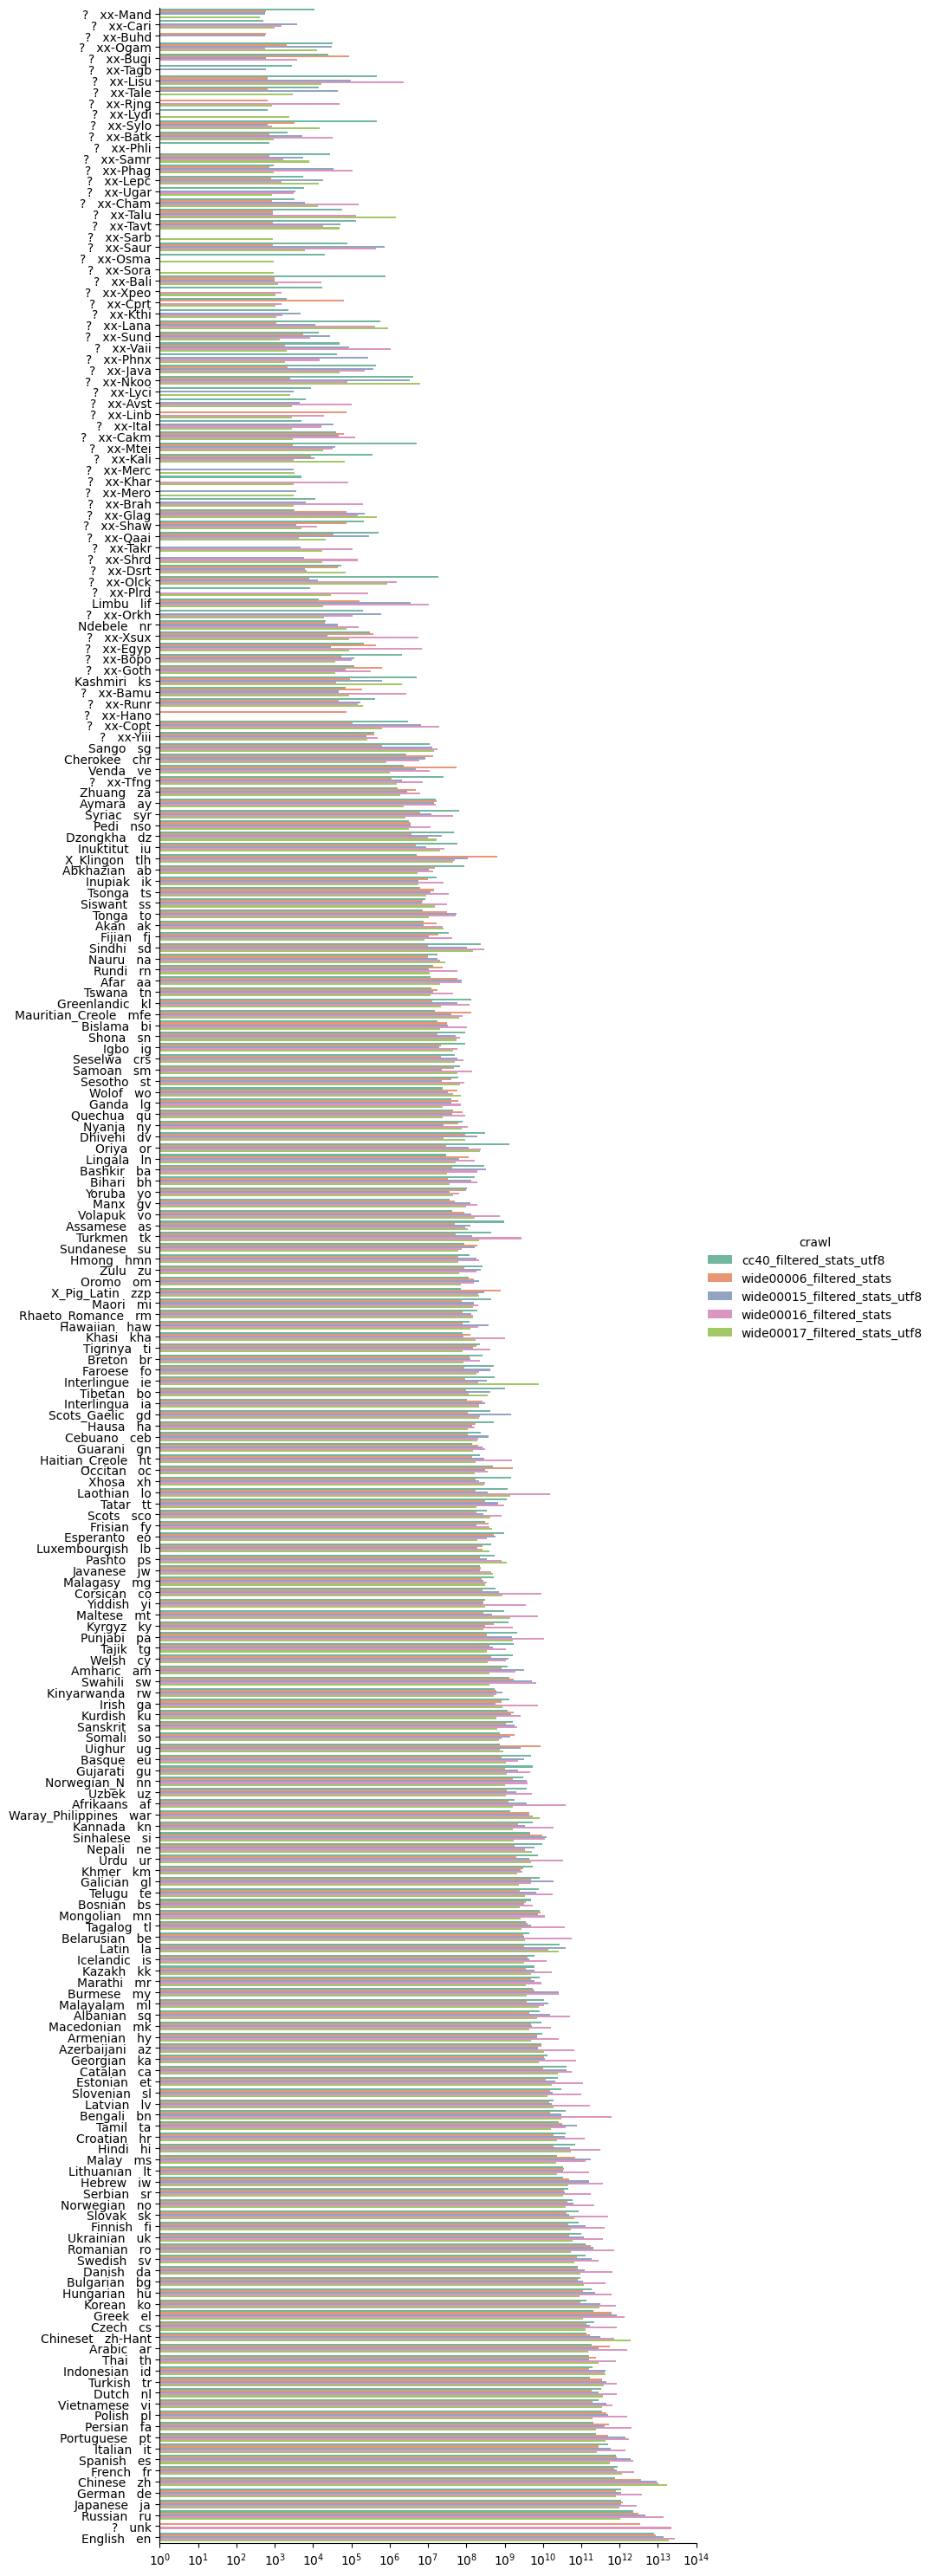

In [8]:
ldf['lang-descr'] = ldf.Name.fillna('?').str.title() + '   ' + ldf.lang
ldf=ldf.sort_values(by='text_bytes')    
plot_langs(ldf)

In [9]:
ldf['lang_props'] = ldf.groupby(['crawl'])['text_bytes'].transform(lambda r: r/r.sum())

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


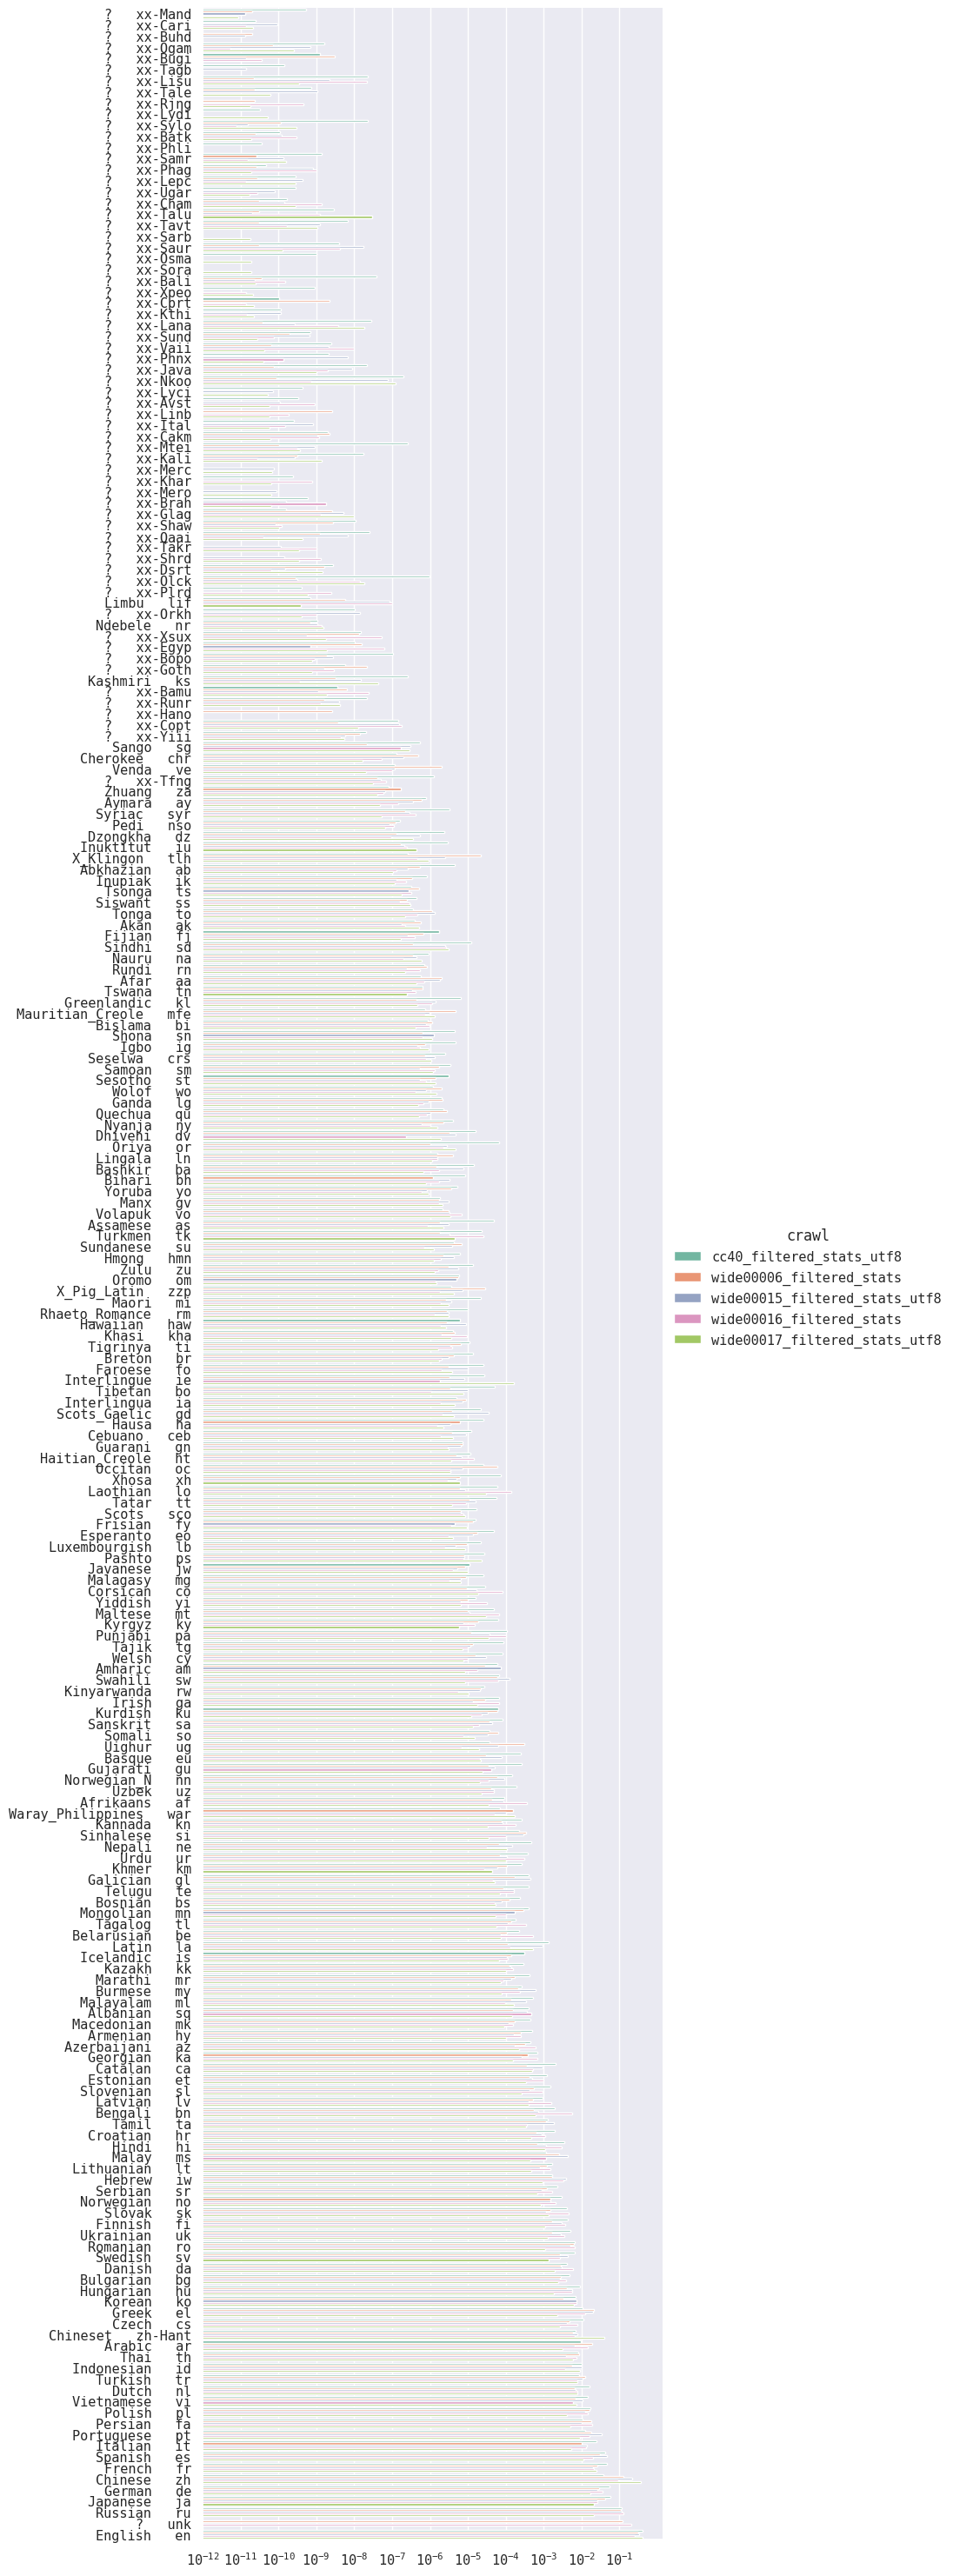

In [10]:
plot_langs(ldf, stat_col='lang_props', xticks=10.**np.arange(-12,0,))

# Plot languages listed in the project proposal

In [11]:
from pathlib import Path
lang2set = [(l,i) for i in range(1,6) for l in pd.read_csv(f'_langs/langs_{i}.txt', header=None)[0] ]

lang2set = pd.DataFrame(lang2set, columns=['lang','set'])
print(len(lang2set))
print(lang2set.set.value_counts())

77
set
5    31
3    22
4    19
2     4
1     1
Name: count, dtype: int64


/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


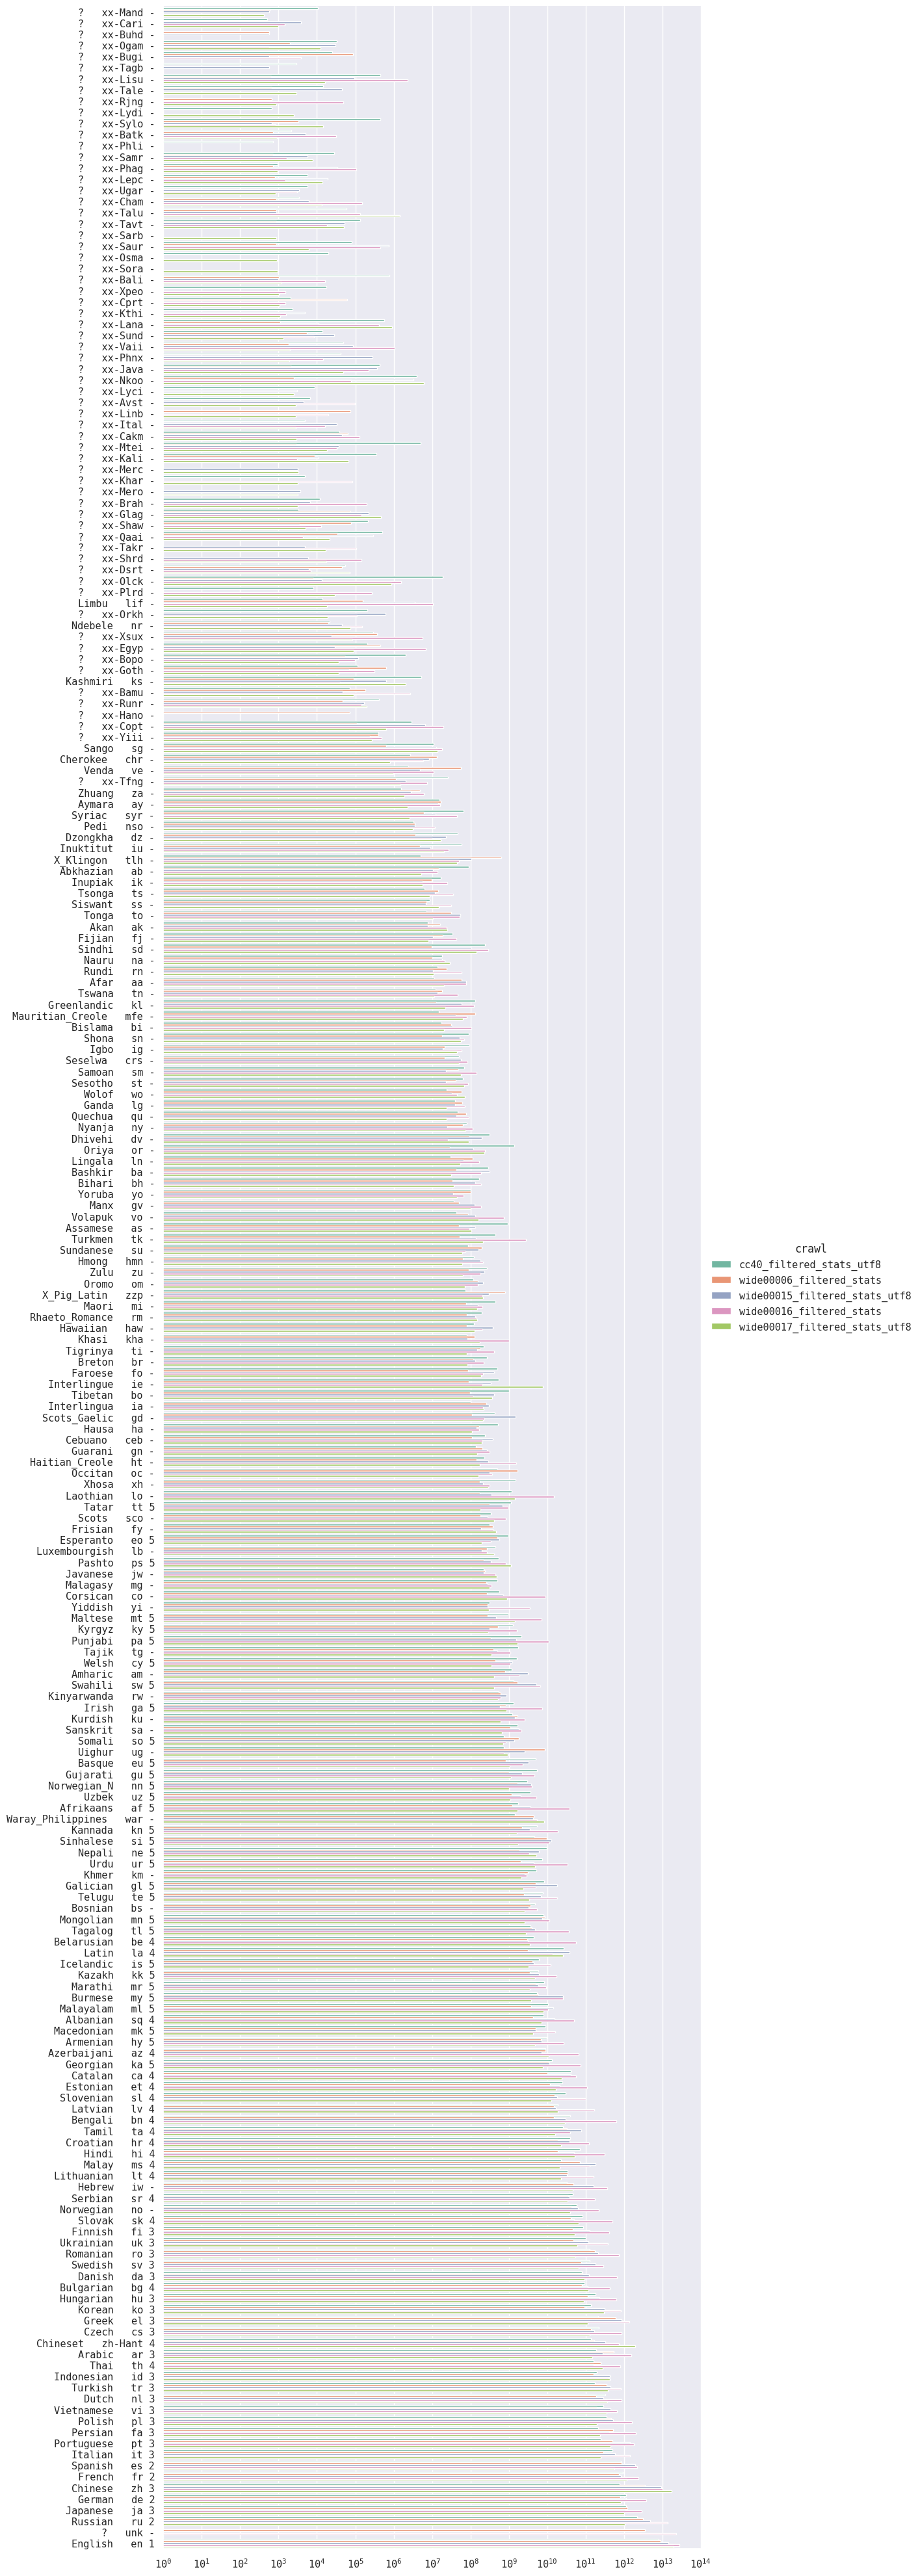

In [12]:
plot_df = ldf.merge(lang2set, on='lang', how='left')
plot_df['lang-descr'] = plot_df.Name.fillna('?').str.title() + '   ' + plot_df.lang + ' ' + plot_df.set.apply(lambda r: '-' if pd.isna(r) else str(int(r)))
plot_df = plot_df.fillna(0.0).sort_values(by='text_bytes')
plot_langs(plot_df, height=40)

In [13]:
# he stands for Hebrew
ldf[ldf.Name.str.contains('hebrew').fillna(False)]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name,lang-descr,lang_props
500,iw,560148949,3333091756,32860518640,3539103,cc40_filtered_stats_utf8,iw,hebrew,Hebrew iw,0.001657
63,iw,1081227042,4744613631,46131686574,5463218,wide00017_filtered_stats_utf8,iw,hebrew,Hebrew iw,0.000961
932,iw,930686345,4756930845,47256791291,5297147,wide00006_filtered_stats,iw,hebrew,Hebrew iw,0.001673
285,iw,2911599978,15577696848,161465723731,8216811,wide00015_filtered_stats_utf8,iw,hebrew,Hebrew iw,0.003849
717,iw,10445562664,38215342037,364024775061,29552732,wide00016_filtered_stats,iw,hebrew,Hebrew iw,0.003375


In [14]:
# nb stands for Norwegian (Bokmål)
ldf[ldf.Name.str.contains('norwegian').fillna(False)]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name,lang-descr,lang_props
97,nn,39401284,150905235,1025643543,246884,wide00017_filtered_stats_utf8,nn,norwegian_n,Norwegian_N nn,0.000021
966,nn,47922371,248837552,1662451604,313049,wide00006_filtered_stats,nn,norwegian_n,Norwegian_N nn,0.000059
534,nn,109918286,409408271,2995985345,581065,cc40_filtered_stats_utf8,nn,norwegian_n,Norwegian_N nn,0.000151
319,nn,124496044,571587124,3768153257,533375,wide00015_filtered_stats_utf8,nn,norwegian_n,Norwegian_N nn,0.000090
751,nn,125251197,507328809,3903872881,495188,wide00016_filtered_stats,nn,norwegian_n,Norwegian_N nn,0.000036
98,no,1727627833,5841600717,40073256568,6348935,wide00017_filtered_stats_utf8,no,norwegian,Norwegian no,0.000835
967,no,1405866490,6639314941,43560763958,7761518,wide00006_filtered_stats,no,norwegian,Norwegian no,0.001542
535,no,1646643214,8574629934,57997268232,9891840,cc40_filtered_stats_utf8,no,norwegian,Norwegian no,0.002925
320,no,2020019858,10079748088,63442991936,8735018,wide00015_filtered_stats_utf8,no,norwegian,Norwegian no,0.001512
752,no,9764735544,31041102563,219090177895,36928686,wide00016_filtered_stats,no,norwegian,Norwegian no,0.002031


In [15]:
lang2set = lang2set.replace({'he':'iw', 'nb':'no'})

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


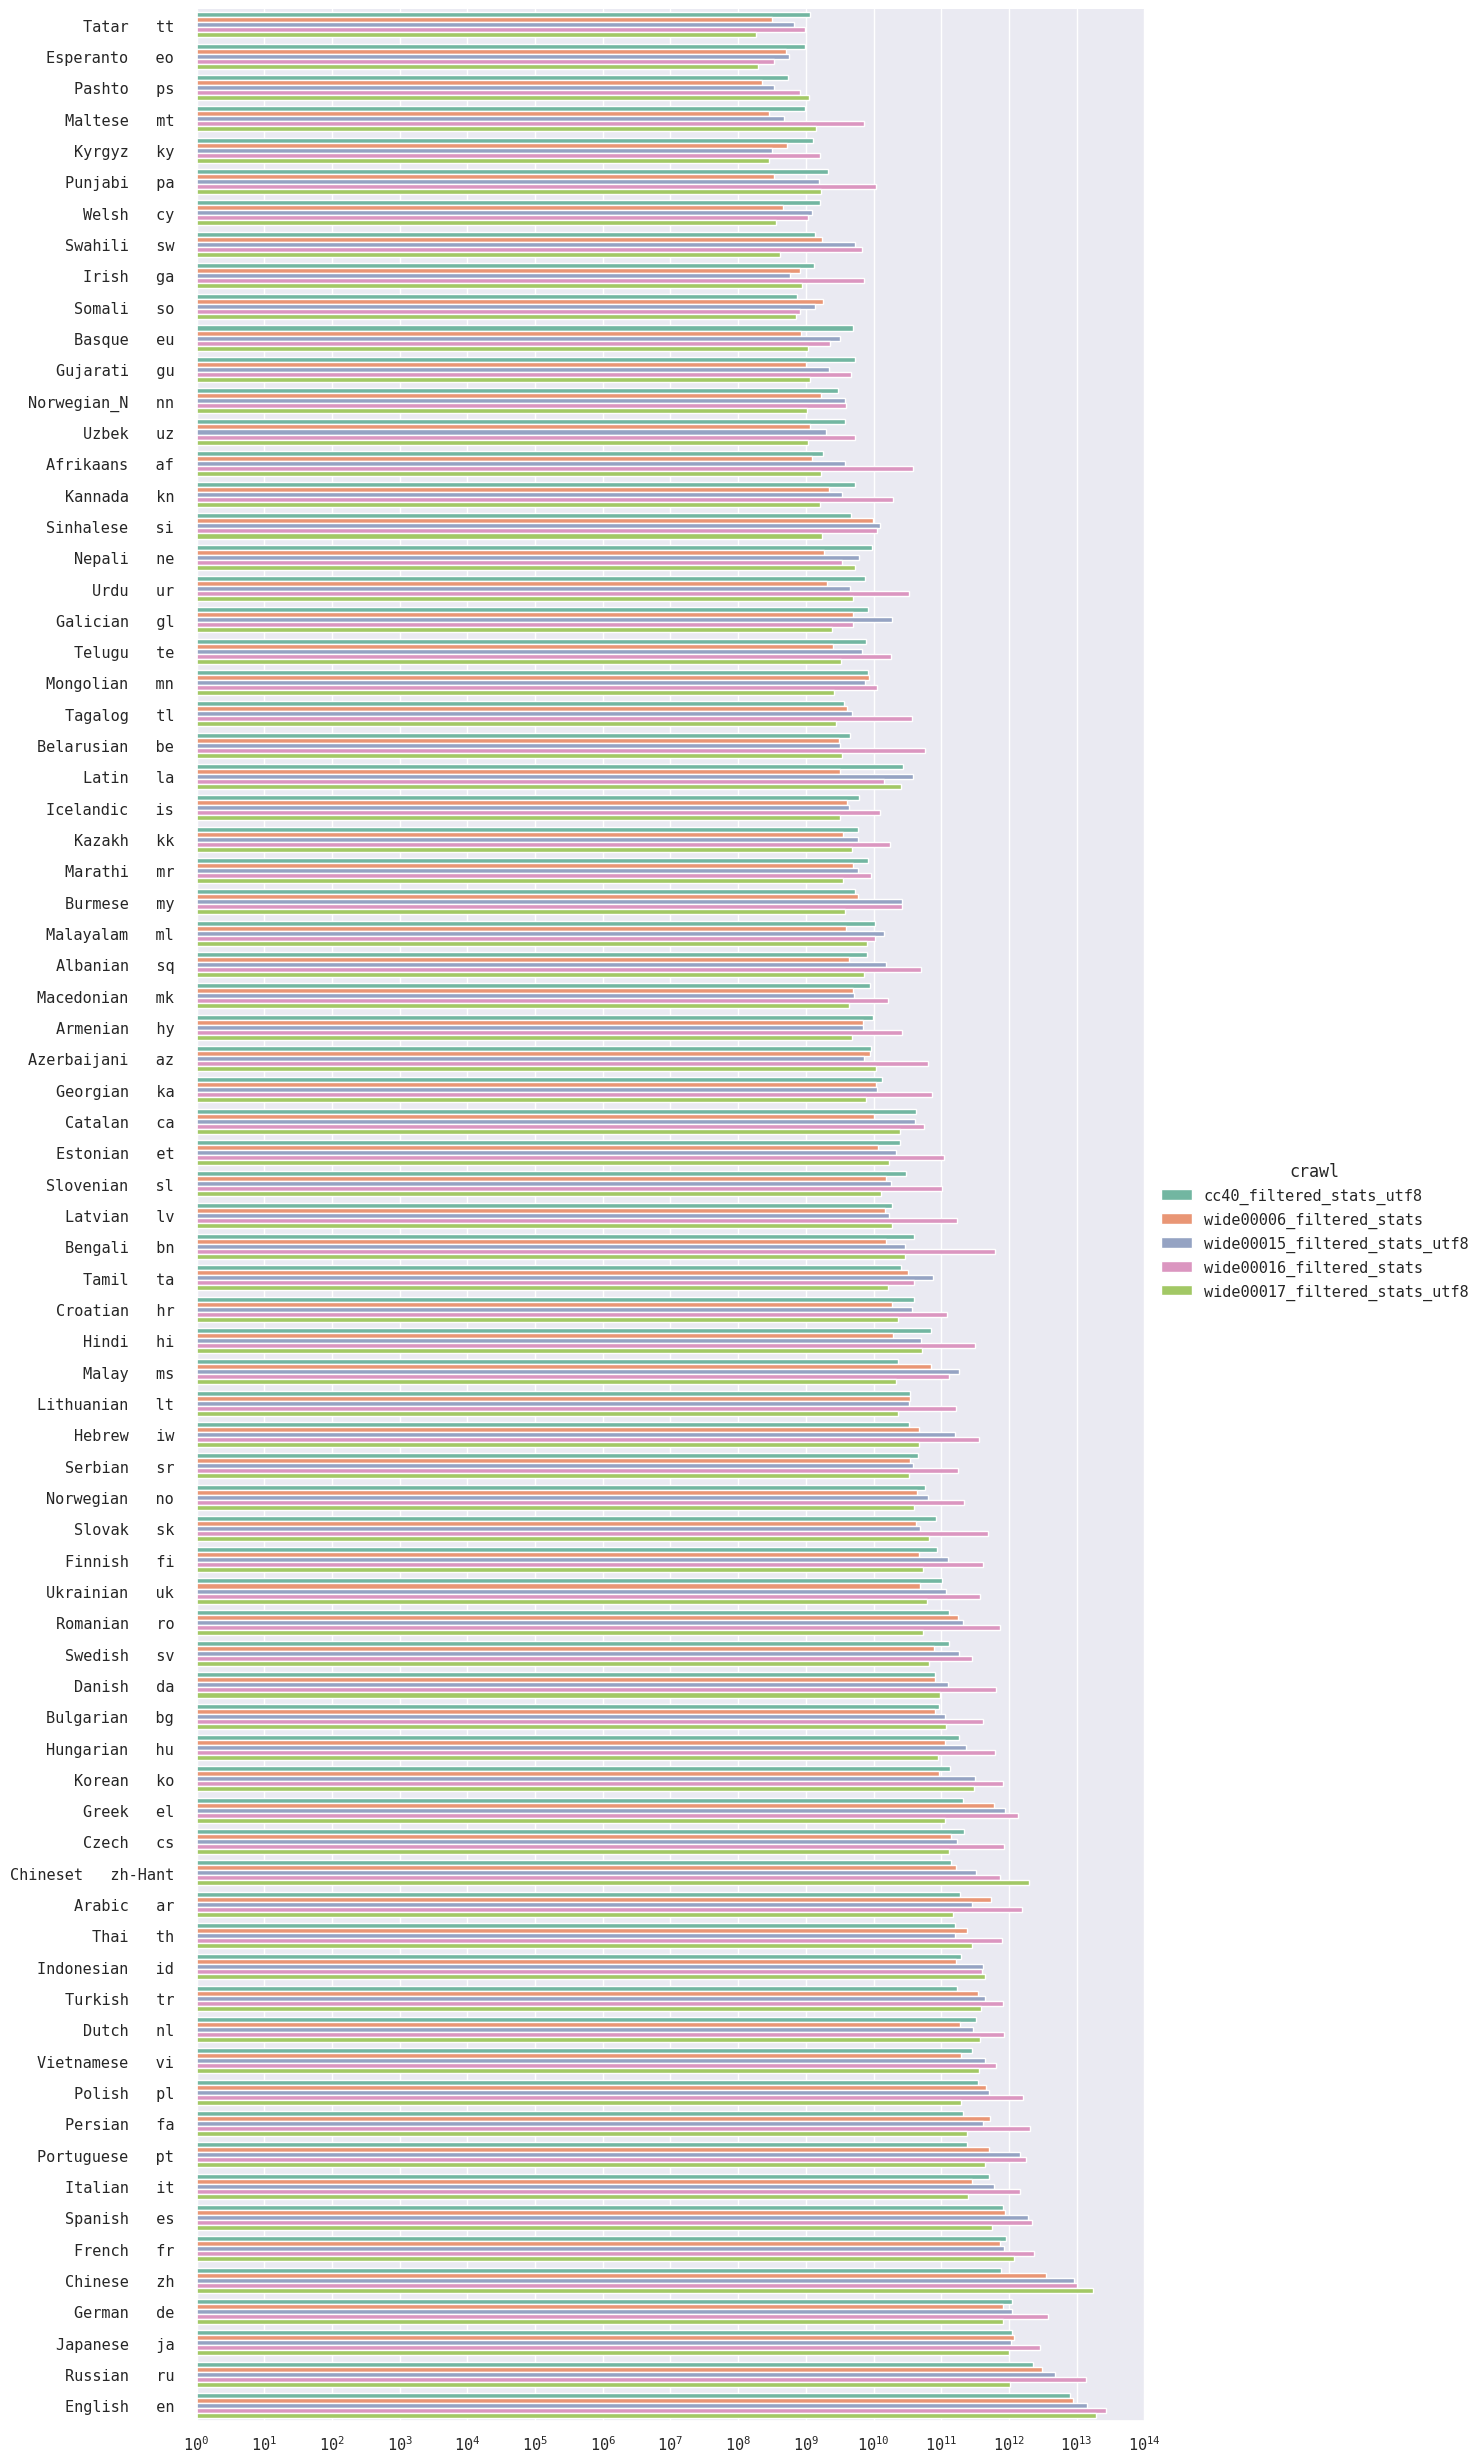

In [16]:
plot_df = ldf.merge(lang2set, on='lang', how='right')
plot_df['lang-descr'] = plot_df.Name.fillna('?').str.title() + '   ' + plot_df.lang + ' ' #+ plot_df.set.astype(str)
plot_df = plot_df.fillna(0.0).sort_values(by='text_bytes')
plot_langs(plot_df, height=25, aspect=0.5)

In [17]:
gdf = plot_df.groupby('lang').agg('sum').drop(columns=['set'])
gdf.describe()

,text_newlines,text_wcwords,text_bytes,docs,lang_props
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,77.000000
mean,7.817922e+10,3.194719e+11,2.853231e+12,4.295788e+08,0.060566
std,2.999591e+11,1.358244e+12,1.023374e+13,1.841122e+09,0.220727
min,5.885285e+07,2.919555e+08,2.592971e+09,3.461670e+05,0.000074
25%,6.227502e+08,2.874299e+09,3.779304e+10,2.858272e+06,0.000837
50%,6.689280e+09,2.609284e+10,1.900221e+11,2.359951e+07,0.004449
75%,4.439909e+10,1.710488e+11,1.614247e+12,1.573573e+08,0.031574
max,2.446730e+12,1.165651e+13,7.731106e+13,1.453442e+10,1.701383


In [18]:
langs1=gdf.sort_values(by='text_bytes').head(40).index.to_list()
langs2=gdf.sort_values(by='text_bytes').tail(len(gdf)-40).index.to_list()

In [19]:
plot_df[plot_df['lang-descr'].str.contains('Pashto')]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name,lang-descr,lang_props,set
340,ps,3755937,26477059,222981806,32540,wide00006_filtered_stats,ps,pashto,Pashto ps,0.000008,5
341,ps,4144873,40183230,338033952,34590,wide00015_filtered_stats_utf8,ps,pashto,Pashto ps,0.000008,5
342,ps,9261914,65746735,539012433,71332,cc40_filtered_stats_utf8,ps,pashto,Pashto ps,0.000027,5
343,ps,16686011,111187745,822885289,87615,wide00016_filtered_stats,ps,pashto,Pashto ps,0.000008,5
344,ps,30165791,139781104,1117237639,120090,wide00017_filtered_stats_utf8,ps,pashto,Pashto ps,0.000023,5


# Build Table 4.2 from the report

In [20]:
q=plot_df.groupby('lang-descr').agg('sum').drop(columns=['set', 'lang_props']).sort_values(by='text_bytes').drop(columns=['lang','Name','Code','crawl'])
lang_order = list(q.index)
q.loc['Total'] = q.sum(numeric_only=True)
q=q*1.0
q.to_csv('qwer.csv', float_format="%.2e", sep='\t')
!cat qwer.csv

lang-descr	text_newlines	text_wcwords	text_bytes	docs
Esperanto   eo 	6.92e+07	3.69e+08	2.59e+09	5.12e+05
Pashto   ps 	6.40e+07	3.83e+08	3.04e+09	3.46e+05
Tatar   tt 	7.05e+07	2.92e+08	3.29e+09	4.06e+05
Kyrgyz   ky 	5.89e+07	3.03e+08	4.01e+09	3.92e+05
Welsh   cy 	1.55e+08	6.90e+08	4.74e+09	8.39e+05
Somali   so 	1.20e+08	8.05e+08	5.43e+09	9.54e+05
Maltese   mt 	3.67e+08	1.44e+09	1.04e+10	9.68e+05
Irish   ga 	3.86e+08	1.54e+09	1.09e+10	2.86e+06
Basque   eu 	3.65e+08	1.66e+09	1.23e+10	2.48e+06
Uzbek   uz 	2.48e+08	1.23e+09	1.32e+10	1.57e+06
Norwegian_N   nn 	4.47e+08	1.89e+09	1.34e+10	2.17e+06
Gujarati   gu 	2.45e+08	1.15e+09	1.43e+10	1.02e+06
Swahili   sw 	4.15e+08	2.37e+09	1.54e+10	2.39e+06
Punjabi   pa 	3.33e+08	1.37e+09	1.64e+10	2.44e+06
Nepali   ne 	2.83e+08	1.81e+09	2.62e+10	2.30e+06
Icelandic   is 	1.03e+09	4.08e+09	3.02e+10	4.42e+06
Kannada   kn 	7.78e+08	2.23e+09	3.18e+10	2.06e+06
Marathi   mr 	4.61e+08	2.39e+09	3.21e+10	1.94e+06
Kazakh   kk 	6.40e+08	2.79e+09	3.74e+10	3.92e+06
M

In [21]:
 plot_df.sort_values(by='lang-descr', key=lambda column: column.map(lambda e: lang_order.index(e)), inplace=True)

In [22]:
plot_df.drop(columns=['set']).groupby('crawl').describe().transpose()

crawl                cc40_filtered_stats_utf8  wide00006_filtered_stats  \
text_newlines count              7.700000e+01              7.700000e+01   
              mean               6.049031e+09              8.015963e+09   
              std                2.424182e+10              3.071876e+10   
              min                9.261914e+06              3.755937e+06   
              25%                9.406427e+07              4.792237e+07   
              50%                6.156575e+08              2.932160e+08   
              75%                3.722365e+09              3.802416e+09   
              max                2.076352e+11              2.483263e+11   
text_wcwords  count              7.700000e+01              7.700000e+01   
              mean               3.192456e+10              3.757770e+10   
              std                1.396576e+11              1.609822e+11   
              min                6.574674e+07              2.647706e+07   
              25%                5.223190e+08              2.599534e+08   
              50%                3.333092e+09              1.761271e+09   
              75%                1.849439e+10              1.403104e+10   
              max                1.206122e+12              1.382488e+12   
text_bytes    count              7.700000e+01              7.700000e+01   
              mean               2.570741e+11              3.214665e+11   
              std                9.463076e+11              1.138055e+12   
              min                5.390124e+08              2.229818e+08   
              25%                5.357566e+09              3.050496e+09   
              50%                2.702866e+10              1.521299e+10   
              75%                1.594368e+11              1.625390e+11   
              max                7.904782e+12              8.879321e+12   
docs          count              7.700000e+01              7.700000e+01   
              mean               3.640442e+07              5.149697e+07   
              std                1.513637e+08              2.184649e+08   
              min                7.133200e+04              3.254000e+04   
              25%                5.810650e+05              3.111540e+05   
              50%                3.539103e+06              1.508110e+06   
              75%                1.925805e+07              1.969471e+07   
              max                1.303529e+09              1.773769e+09   
lang_props    count              7.700000e+01              7.700000e+01   
              mean               1.296378e-02              1.137893e-02   
              std                4.772057e-02              4.028369e-02   
              min                2.718142e-05              7.892876e-06   
              25%                2.701723e-04              1.079783e-04   
              50%                1.363006e-03              5.384936e-04   
              75%                8.040107e-03              5.753385e-03   
              max                3.986238e-01              3.143009e-01   

crawl                wide00015_filtered_stats_utf8  wide00016_filtered_stats  \
text_newlines count                   7.700000e+01              7.700000e+01   
              mean                    1.389784e+10              3.499628e+10   
              std                     5.313784e+10              1.234988e+11   
              min                     4.144873e+06              1.099749e+07   
              25%                     9.307564e+07              2.775663e+08   
              50%                     7.026303e+08              4.179525e+09   
              75%                     5.740533e+09              2.373365e+10   
              max                     4.016597e+11              1.013690e+12   
text_wcwords  count                   7.700000e+01              7.700000e+01   
              mean                    6.358278e+10              1.254611e+11   
              std                     2.6753

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Raw text size for languages listed in the proposal')

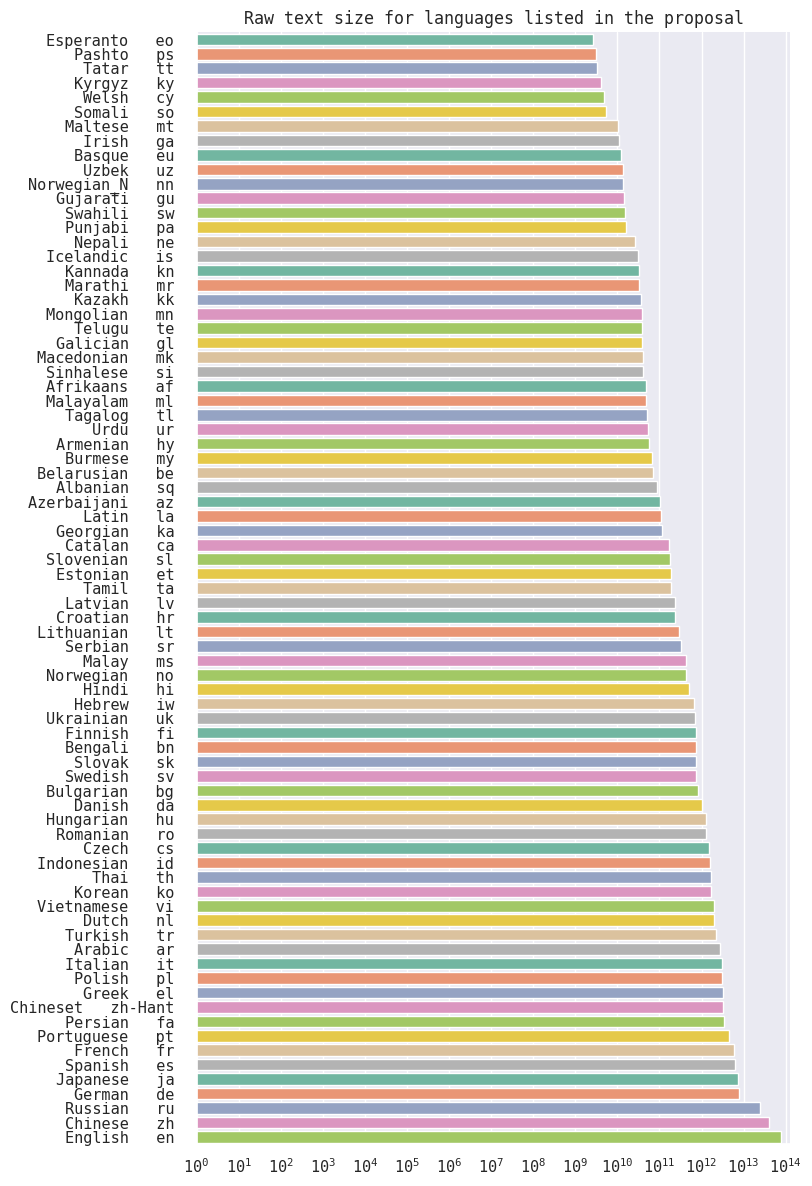

In [23]:
sum_plot_df = plot_df.groupby(['lang','lang-descr']).agg('sum').reset_index().sort_values(by='text_bytes')
plot_langs(sum_plot_df, part_col=None, height=12, aspect=0.7)
plt.title('Raw text size for languages listed in the proposal')

In [24]:
plot_df.columns

Index(['lang', 'text_newlines', 'text_wcwords', 'text_bytes', 'docs', 'crawl',
       'Code', 'Name', 'lang-descr', 'lang_props', 'set'],
      dtype='object')

In [25]:
for c in ['text_newlines', 'text_wcwords', 'text_bytes', 'docs']:
    plot_df[c+'_prop'] = plot_df.groupby(['lang','lang-descr'])[c].transform(lambda r: r/r.sum())


In [26]:
ldf.groupby('crawl')['text_bytes'].agg('sum') / 2**40

crawl
cc40_filtered_stats_utf8         18.035444
wide00006_filtered_stats         25.694153
wide00015_filtered_stats_utf8    38.150236
wide00016_filtered_stats         98.092500
wide00017_filtered_stats_utf8    43.648797
Name: text_bytes, dtype: float64

In [34]:
plot_df.groupby('crawl')['text_wcwords'].agg('sum') / 2**40

crawl
cc40_filtered_stats_utf8         2.235711
wide00006_filtered_stats         2.631607
wide00015_filtered_stats_utf8    4.452771
wide00016_filtered_stats         8.786178
wide00017_filtered_stats_utf8    4.266697
Name: text_wcwords, dtype: float64

In [28]:
plot_df.crawl.str.replace('.*filter_stats','', regex=True)

244         cc40_filtered_stats_utf8
240    wide00017_filtered_stats_utf8
241         wide00016_filtered_stats
243    wide00015_filtered_stats_utf8
242         wide00006_filtered_stats
                   ...              
3      wide00017_filtered_stats_utf8
0           cc40_filtered_stats_utf8
1           wide00006_filtered_stats
2      wide00015_filtered_stats_utf8
4           wide00016_filtered_stats
Name: crawl, Length: 385, dtype: object

In [29]:
plot_df.groupby('crawl').sum() 

,lang,text_newlines,text_wcwords,text_bytes,docs,Code,Name,lang-descr,lang_props,set,text_newlines_prop,text_wcwords_prop,text_bytes_prop,docs_prop
crawl,,,,,,,,,,,,,,
cc40_filtered_stats_utf8,eopsttkycysomtgaeuuznnguswpaneisknmrkkmnteglmk...,465775385639,2458190784964,19794708074401,2803140170,eopsttkycysomtgaeuuznnguswpaneisknmrkkmnteglmk...,esperantopashtotatarkyrgyzwelshsomalimalteseir...,Esperanto eo Pashto ps Tatar tt Kyrgyz ...,0.998211,306,9.948681,11.369559,11.672378,13.357474
wide00006_filtered_stats,eopsttkycysomtgaeuuznnguswpaneisknmrkkmnteglmk...,617229182933,2893482819836,24752917668627,3965266354,eopsttkycysomtgaeuuznnguswpaneisknmrkkmnteglmk...,esperantopashtotatarkyrgyzwelshsomalimalteseir...,Esperanto eo Pashto ps Tatar tt Kyrgyz ...,0.876178,306,7.099895,8.039379,7.959100,8.844602
wide00015_filtered_stats_utf8,eopsttkycysomtgaeuuznnguswpaneisknmrkkmnteglmk...,1070133570666,4895873740723,41914531038119,5119199904,eopsttkycysomtgaeuuznnguswpaneisknmrkkmnteglmk...,esperantopashtotatarkyrgyzwelshsomalimalteseir...,Esperanto eo Pashto ps Tatar tt Kyrgyz ...,0.999235,306,12.257338,14.372949,13.843637,11.604660
wide00016_filtered_stats,eopsttkycysomtgaeuuznnguswpaneisknmrkkmnteglmk...,2694713547320,9660504416000,85278570810440,10832970792,eopsttkycysomtgaeuuznnguswpaneisknmrkkmnteglmk...,esperantopashtotatarkyrgyzwelshsomalimalteseir...,Esperanto eo Pashto ps Tatar tt Kyrgyz ...,0.790686,306,39.127919,34.717234,34.798051,33.410650
wide00017_filtered_stats_utf8,eopsttkycysomtgaeuuznnguswpaneisknmrkkmnteglmk...,1171948183481,4691282963049,47958076657507,10356987225,eopsttkycysomtgaeuuznnguswpaneisknmrkkmnteglmk...,esperantopashtotatarkyrgyzwelshsomalimalteseir...,Esperanto eo Pashto ps Tatar tt Kyrgyz ...,0.999286,306,8.566168,8.500879,8.726833,9.782615


/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(118.8573330965908, 0.5, '')

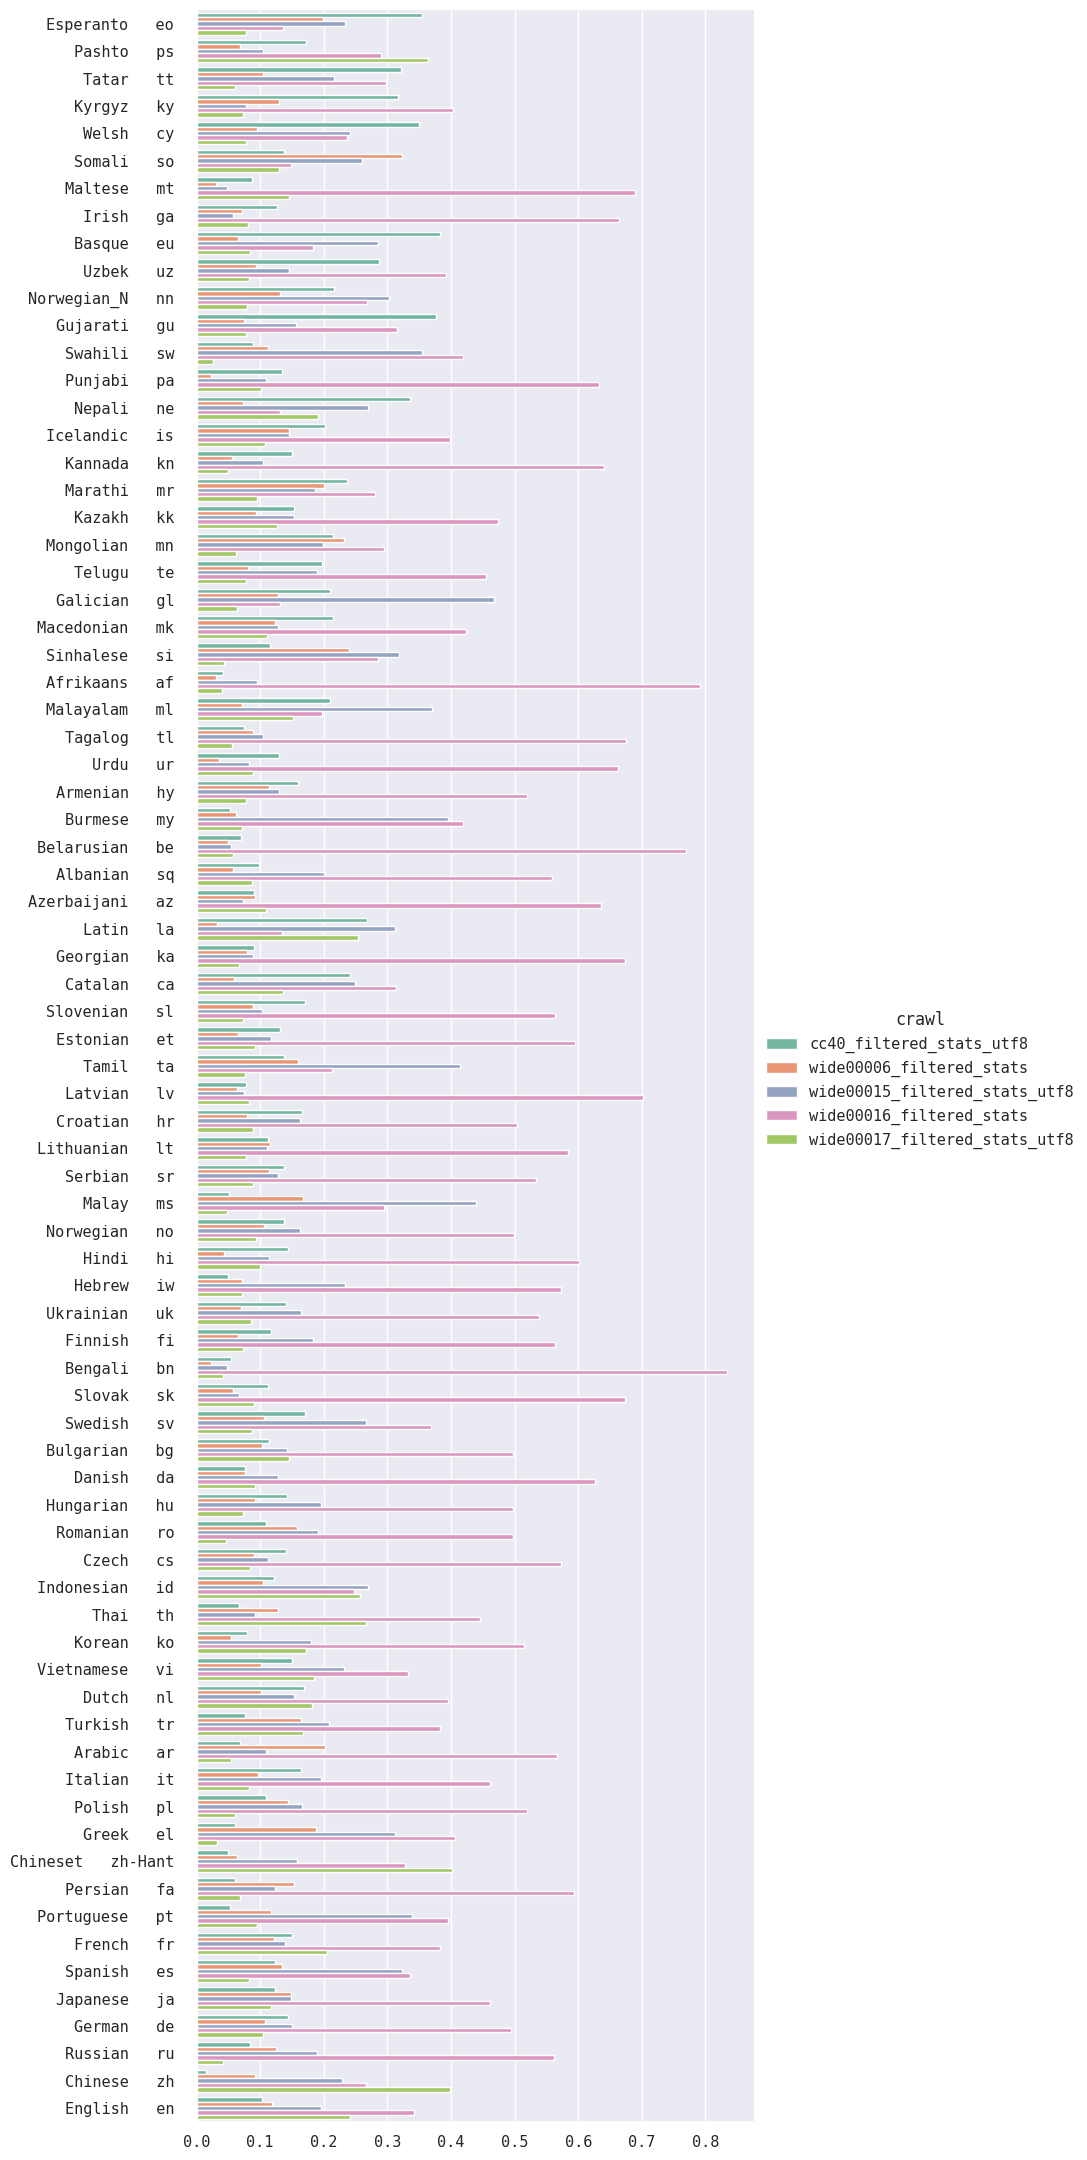

In [30]:
sns.set_context('notebook')
plot_langs(plot_df,stat_col='text_wcwords_prop', height=22, aspect=0.4, 
           logscale=False,xticks=None)
plt.xlabel('')
plt.ylabel('')
# plt.title('Proportions of texts coming from each dataset for the languages listed in the proposal')

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(3.200000000000017, 0.5, '')

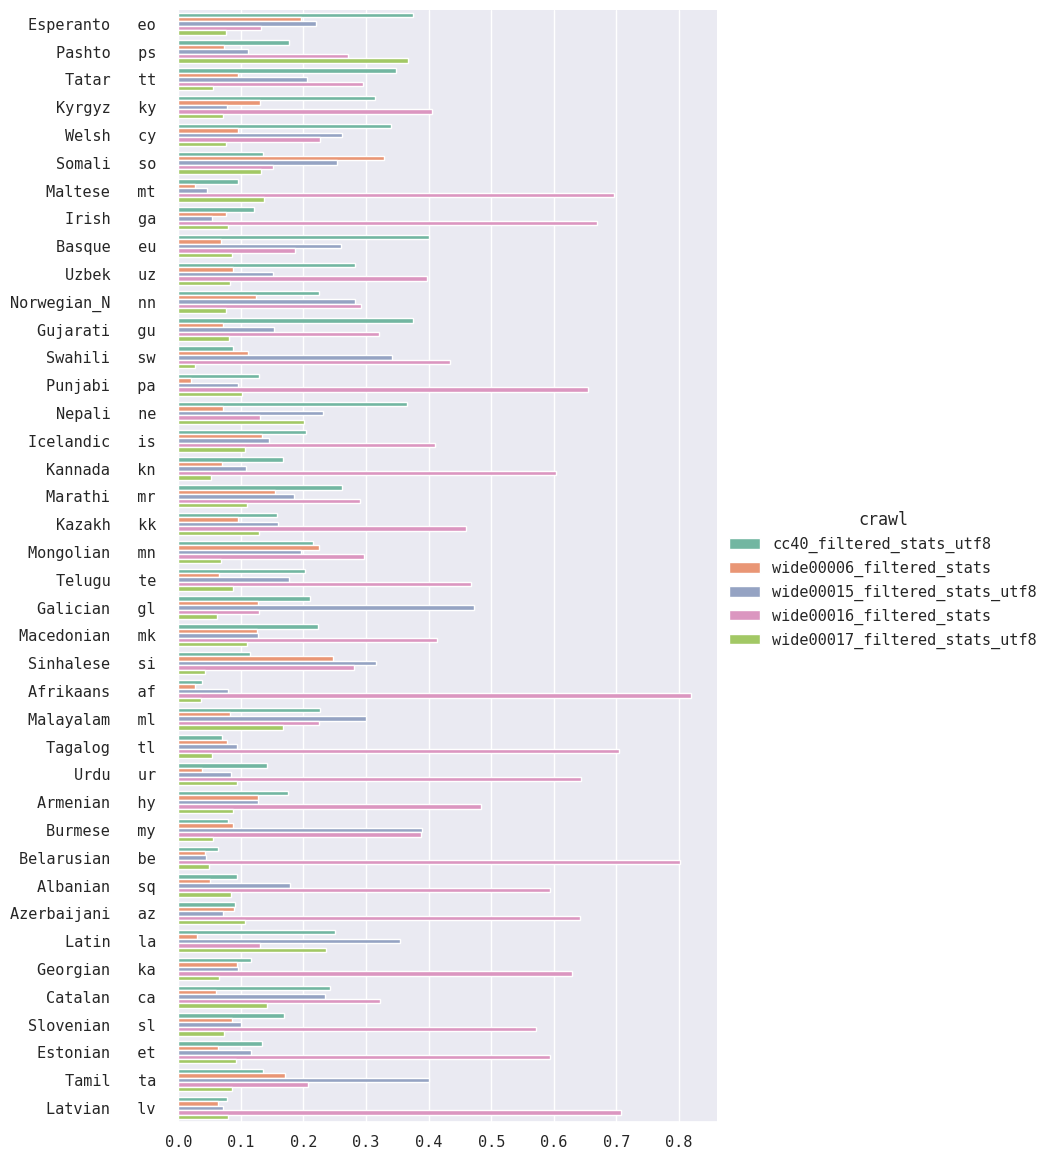

In [31]:
sns.set_context('notebook')
plot_langs(plot_df[plot_df.lang.isin(langs1)],stat_col='text_bytes_prop', height=12, aspect=0.7, 
           logscale=False,xticks=None, fpath='text_bytes_prop1.pdf')
plt.xlabel('')
plt.ylabel('')
# plt.title('Proportions of texts coming from each dataset for the languages listed in the proposal')

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(3.1999999999999886, 0.5, '')

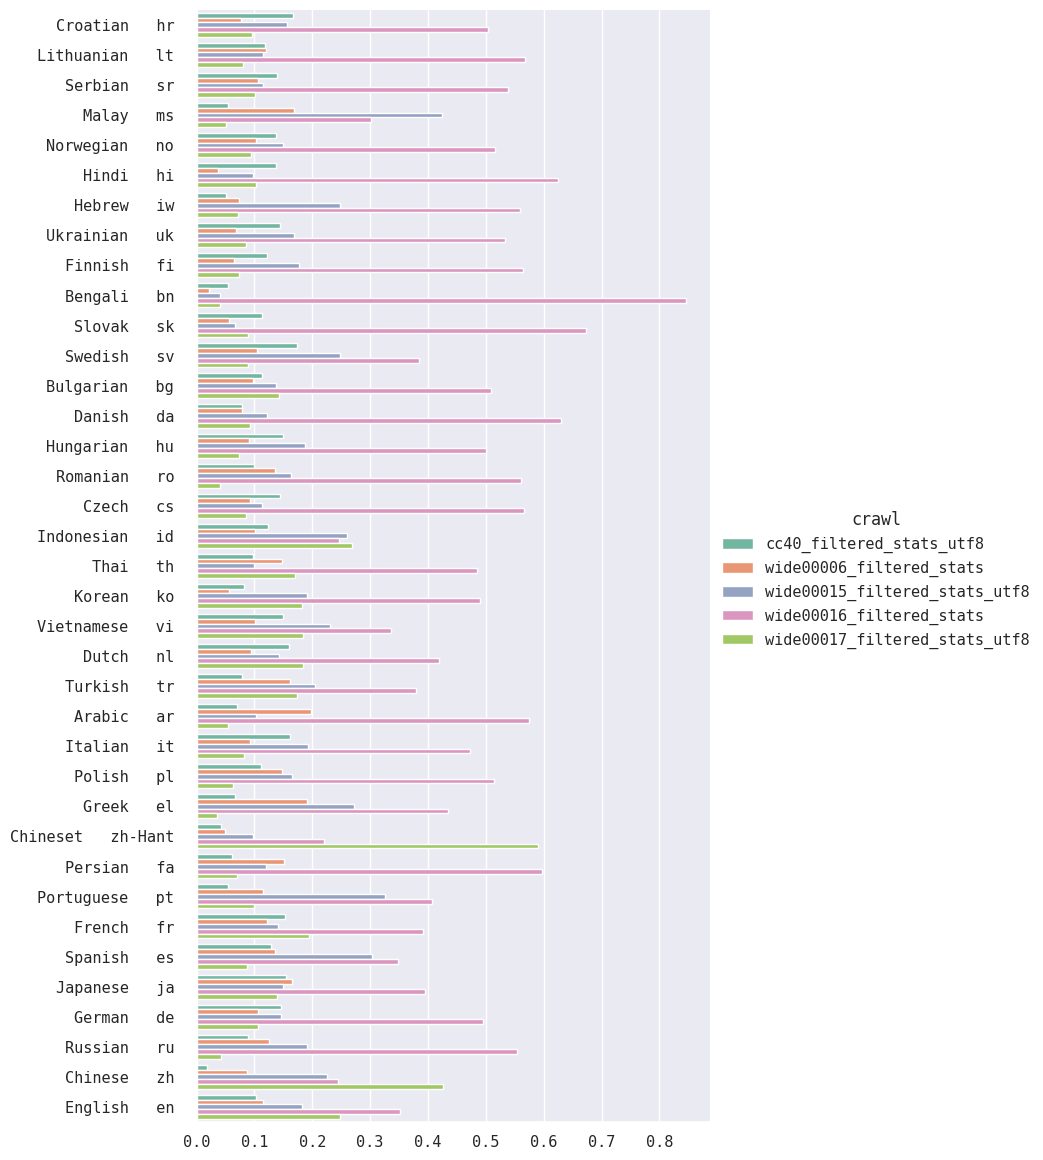

In [32]:
sns.set_context('notebook')
plot_langs(plot_df[plot_df.lang.isin(langs2)],stat_col='text_bytes_prop', height=12, aspect=0.7, 
           logscale=False,xticks=None, fpath='text_bytes_prop2.pdf')
plt.xlabel('')
plt.ylabel('')
# plt.title('Proportions of texts coming from each dataset for the languages listed in the proposal')